In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
import time

<p>Se decidió realizar una prueba con algunos datos ingresados, a ver si se podrían evaluar transacciones de manera individual, simulando un flujo de procesamiento de un control de transacción verdadero, como no tenemos acceso a datos de una base de datos, simplemente se estableceran por default ciertos datos y otros si se permitirán ingresar para prueba</p>
<p>[category, amt, state, city_pop, trans_hora, tras_mes, trans_dia, delay_entre_trans, edad_usuario, dif_lat_comprador_merch,
    dif_long_comprador_merch, dif_lat_prev_merch, dif_long_prev_merch, gender_F]</p>
<p>Se decidio que columnas como state, city_pop, delay_entre_trans, dif_lat_comprador_merch, dif_long_comprador_merch, dif_lat_prev_march,dif_long_prev_march serán por default 0</p>

<p>Los datos que si podrán ingresar son [category, amt, trans_hora, trans_mes, trans_dia, edad_usuario, gender_f]</p>

In [2]:
!pip install -q feature_engine


In [3]:
#Importamos datos para procesar el dato nuevo
data_proc=pd.read_csv('C:/Users/Freyja/Desktop/tpML/DataSets/fraudtest_SinProcSinFraudCol.csv')

In [4]:
data_proc

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,home,124.66,F,WY,1645,13,6,Sunday,1440.0,34,0.059274,0.365499,0.000000,0.000000
1,misc_pos,78.52,F,WY,1645,16,6,Sunday,199.0,34,0.811670,0.214346,0.752396,0.151153
2,gas_transport,65.25,F,WY,1645,7,6,Monday,932.0,34,0.927924,0.803394,1.739594,1.017740
3,kids_pets,87.74,F,WY,1645,15,6,Monday,453.0,34,0.541264,0.316539,0.386660,0.486855
4,personal_care,148.02,F,WY,1645,12,6,Tuesday,1256.0,34,0.128262,0.436820,0.669526,0.120281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,gas_transport,66.11,M,IL,532,2,12,Thursday,134.0,65,0.257411,0.412274,0.980730,0.218192
555715,misc_net,4.58,M,IL,532,5,12,Thursday,183.0,65,0.535512,0.661900,0.278101,1.074174
555716,gas_transport,95.96,M,IL,532,11,12,Thursday,362.0,65,0.303292,0.151707,0.232220,0.813607
555717,grocery_pos,149.48,M,IL,532,11,12,Thursday,1.0,65,0.264224,0.913553,0.567516,1.065260


In [5]:
#tomaremos 10mil datos
proc_sample=data_proc.sample(n=10000)

In [6]:
proc_sample.reset_index(inplace=True, drop=True)
proc_sample

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,food_dining,3.47,M,WA,895,17,7,Saturday,95.0,21,0.404819,0.724573,0.239631,1.111740
1,misc_pos,36.83,M,TX,686,4,8,Monday,938.0,40,0.784678,0.471880,1.354085,0.353951
2,gas_transport,57.84,M,MN,914,5,10,Sunday,284.0,76,0.414941,0.131787,0.540401,0.815001
3,grocery_net,64.05,M,TX,194500,7,12,Saturday,136.0,29,0.720799,0.453228,1.196299,1.252408
4,home,69.62,F,NY,722,15,12,Monday,21.0,30,0.106376,0.128417,0.277537,0.959351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,kids_pets,21.20,F,OK,551,22,10,Monday,142.0,50,0.516333,0.495341,1.066334,0.571482
9996,gas_transport,55.87,M,IL,532,3,11,Monday,580.0,64,0.347643,0.074658,0.030764,0.212548
9997,entertainment,9.11,F,CA,1139,19,12,Wednesday,14.0,69,0.259629,0.179361,0.649222,0.738608
9998,shopping_pos,5.06,F,FL,717255,3,7,Tuesday,728.0,53,0.536070,0.431376,0.010321,0.819456


In [7]:
def resetSample():
    proc_sample=data_proc.sample(n=10000)
    proc_sample.reset_index(inplace=True, drop=True)
    return proc_sample

<h4>Winsorizar datos numericos - outliers</h4>

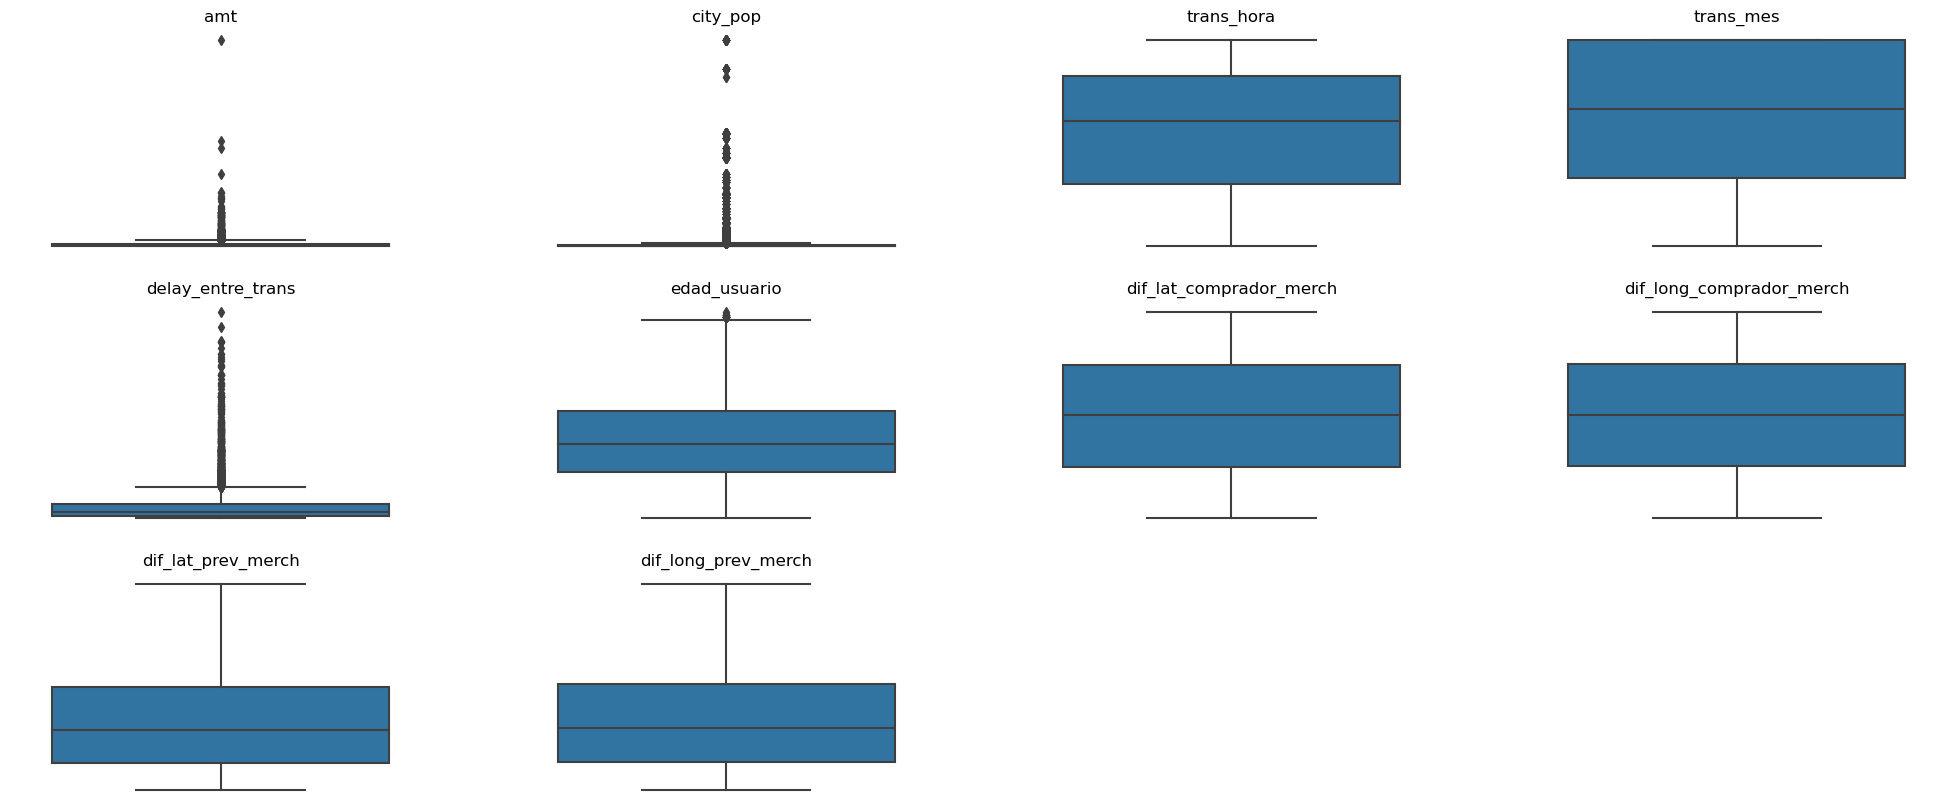

In [8]:
col_numericas=proc_sample.select_dtypes(include=np.number).columns

plt.figure(figsize=[25,10])

for indice, col_nombre in enumerate(col_numericas):
    plot_var=proc_sample[col_nombre]
    plt.subplot(3,4,indice+1)
    sns.boxplot(plot_var)
    plt.title(col_nombre)
    plt.axis(False)

In [9]:
#De los datos que pueden recibir, los numericos serian amt, trans_hora, trans_mes, edad_usuario
#Igualmente, por analisis anteriores, sabemos que trans_hora y trans_mes no poseen outliers
def winsorizar(data):
    from feature_engine.outliers import Winsorizer
    variables_out=['amt','edad_usuario','city_pop','delay_entre_trans']
    capper= Winsorizer(capping_method='iqr',tail='both', fold=1.5, variables=variables_out)
    capper.fit(data)
    data=capper.transform(data)
    return data

<h4>Codificar variables categoricas</h4>

In [10]:
#De los datos que pueden recibir, los categoricos serían category, trans_dia
def codOneHotCasero(data):
    generos={'M':0,'F':1}
    #genero codificado por oneHotEncoderCasero
    data['gender']=data['gender'].tolist()
    for valor in data['gender']:
        data['gender']=data['gender'].replace({valor:generos[valor]})        
    return data

def codMeanCasero(data):
    estados={'0':0,
        'ak': 0.016981132075471698,
      'al': 0.005245309717241211,
      'ar': 0.00517235840267292,
      'az': 0.003435468895078923,
      'ca': 0.005784244144783534,
      'co': 0.00814121037463977,
      'ct': 0.002077382498052454,
      'dc': 0.005812344312205923,
      'de': 1.0,
      'fl': 0.006585268683649317,
      'ga': 0.005601810996431723,
      'hi': 0.0027354435326299334,
      'ia': 0.005262182694089309,
      'id': 0.0019837691614066726,
      'il': 0.005733838897623232,
      'in': 0.005148658448150834,
      'ks': 0.006783788484953905,
      'ky': 0.005443371378402107,
      'la': 0.004340567612687813,
      'ma': 0.005575307045895281,
      'md': 0.005993967854006796,
      'me': 0.007209936382914268,
      'mi': 0.005156649477835074,
      'mn': 0.006527085829602069,
      'mo': 0.004973569773194802,
      'ms': 0.005427600528601095,
      'mt': 0.00272247745448358,
      'nc': 0.004923015925460913,
      'nd': 0.0038549979710536995,
      'ne': 0.007447864945382324,
      'nh': 0.00712732544092776,
      'nj': 0.004796163069544364,
      'nm': 0.004997866764186018,
      'nv': 0.008382379168896023,
      'ny': 0.006646626986503155,
      'oh': 0.006906196213425129,
      'ok': 0.0053616287353305085,
      'or': 0.008012044953487122,
      'pa': 0.005735970042706677,
      'ri': 0.02727272727272727,
      'sc': 0.006611853374443303,
      'sd': 0.006004543979227524,
      'tn': 0.007975390224450268,
      'tx': 0.005048695138918167,
      'ut': 0.005701467426862323,
      'va': 0.00676923076923077,
      'vt': 0.006118286879673691,
      'wa': 0.0050729232720355105,
      'wi': 0.005550258785072188,
      'wv': 0.005682923981160718,
      'wy': 0.005692992443846393}
    
    categorias= {'entertainment': 0.0024783542876592847,
      'food_dining': 0.0016509769191239982,
      'gas_transport': 0.004693944204346076,
      'grocery_net': 0.0029481650972454456,
      'grocery_pos': 0.014097607531665023,
      'health_fitness': 0.0015486905995645036,
      'home': 0.0016082524468992406,
      'kids_pets': 0.0021143893484319018,
      'misc_net': 0.014457945549638947,
      'misc_pos': 0.003138534931893792,
      'personal_care': 0.002424028735758831,
      'shopping_net': 0.017561485703740914,
      'shopping_pos': 0.007225383982446517,
      'travel': 0.0028637025699261858}

    dias={'Friday': 0.007086003992854892,
      'Monday': 0.004648382504463549,
      'Saturday': 0.006105783824400245,
      'Sunday': 0.004852761005511236,
      'Thursday': 0.006843874121600977,
      'Tuesday': 0.0058354709256242705,
      'Wednesday': 0.006553599902344495}

    

    #category, state y trans_dia utilizando diccionario
    data['category']=data['category'].tolist()
    for val in data['category']:
         data['category']=data['category'].replace({val:categorias[val]})
        
    data['trans_dia']  =data['trans_dia'].tolist()
    for value in data['trans_dia']:
        data['trans_dia']=data['trans_dia'].replace({value:dias[value]})  
        
    if not pd.to_numeric(data['state'], errors='coerce').notna().all():
        data['state']=data['state'].apply(lambda x: x.lower())
        data['state']=data['state'].tolist()
        for value in data['state']:
            data['state']=data['state'].replace({value:estados[value]})
    return data
    

def codificar(data):
    data=codOneHotCasero(data)
    data=codMeanCasero(data)
    return data
    

<h4>Normalizacion y escalado</h4>

In [11]:
#Normalizar todo el data
def normalizar(data):
    from feature_engine.transformation import YeoJohnsonTransformer
    yj_trans=YeoJohnsonTransformer(variables=data.columns.to_list())
    yj_trans.fit(data)
    data=yj_trans.transform(data)
    return data

In [12]:
#Escalar
def escalar(data):
    from sklearn.preprocessing import RobustScaler
    scaler=RobustScaler()
    scaler.fit(data)
    data=pd.DataFrame(data=scaler.transform(data),columns=data.columns.tolist())
    return data

In [13]:
def arreglarcolumna(data):
    data=data.rename(columns={'gender':'gender_f'})
    #movemos columna al final
    col=data.pop('gender_f')
    data=pd.concat([data,col],axis=1)
    return data

In [14]:
def procesamiento(data):
    data=codificar(data)
    data=winsorizar(data)
    data=normalizar(data)
    data=escalar(data)
    data= arreglarcolumna(data)
    return data

<h4>Funcion procesamiento de consulta</h4>

In [15]:
proc_sample= resetSample()
proc_sample.tail()

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
9995,grocery_pos,117.07,F,ME,1131,4,8,Sunday,332.0,61,0.707106,0.438715,0.378383,0.763911
9996,kids_pets,72.42,M,OK,55345,15,7,Sunday,236.0,72,0.910121,0.292131,0.335370,0.287157
9997,shopping_pos,7.26,F,AL,1089,12,6,Monday,312.0,48,0.380940,0.805086,1.165690,1.026562
9998,misc_net,4.44,M,WV,5512,0,12,Wednesday,12.0,40,0.056862,0.020198,0.391054,0.233524
9999,shopping_pos,2.21,F,ME,1643,12,9,Monday,108.0,44,0.192418,0.783865,0.950472,0.544608


In [16]:
#guardamos proc_sample
ruta_guardar='C:/Users/Freyja/Desktop/tpML/DataSets/sample_proc_consultas.csv'
proc_sample.to_csv(ruta_guardar,index=False)
ruta_guardar2='C:/Users/Freyja/Desktop/tpML/DataSets/sample_proc_consultas.pkl'
with open(ruta_guardar2,'wb') as f:
    pickle.dump(proc_sample,f)

In [17]:
df=pd.read_pickle(ruta_guardar2)
df

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,kids_pets,43.43,M,MN,1536,13,8,Thursday,4019.0,39,0.399017,0.931225,0.691312,1.309428
1,gas_transport,58.31,F,SC,1523,11,12,Tuesday,467.0,36,0.794934,0.033581,0.908776,0.024218
2,grocery_pos,111.12,M,OH,177,4,6,Sunday,955.0,46,0.194131,0.599637,0.106019,0.406084
3,grocery_pos,228.98,F,AR,4726,3,8,Saturday,885.0,43,0.727795,0.383897,1.513123,0.252196
4,home,14.09,F,WA,149,23,12,Tuesday,76.0,42,0.381147,0.214107,0.400082,0.005375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,grocery_pos,117.07,F,ME,1131,4,8,Sunday,332.0,61,0.707106,0.438715,0.378383,0.763911
9996,kids_pets,72.42,M,OK,55345,15,7,Sunday,236.0,72,0.910121,0.292131,0.335370,0.287157
9997,shopping_pos,7.26,F,AL,1089,12,6,Monday,312.0,48,0.380940,0.805086,1.165690,1.026562
9998,misc_net,4.44,M,WV,5512,0,12,Wednesday,12.0,40,0.056862,0.020198,0.391054,0.233524


In [18]:
def procesarConsulta(dataframe,consultaDataFrame):
    df_unido=dataframe.append(consultaDataFrame,ignore_index=True)
    dataProcesada=procesamiento(df_unido)
    fila=dataProcesada.iloc[[len(dataProcesada)-1]]
    return fila
    

<h4>Pruebas</h4>

In [19]:
#Importamos modelo para probar
with open('modelo2_entrenado.pkl','rb')as archivo: 
    modelo=pickle.load(archivo)

In [20]:
#Importamos datos para probar
data_prueba =pd.read_csv('C:/Users/Freyja/Desktop/tpML/DataSets/fraudtest_SinProccompleto.csv')

In [21]:
fraudes=data_prueba[data_prueba['is_fraud']==1]
leg=data_prueba[data_prueba['is_fraud']==0]

In [22]:
fraudes=fraudes.drop('is_fraud',axis=1)
leg=leg.drop('is_fraud',axis=1)

In [23]:
leg.head()

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,home,124.66,F,WY,1645,13,6,Sunday,1440.0,34,0.059274,0.365499,0.000000,0.000000
1,misc_pos,78.52,F,WY,1645,16,6,Sunday,199.0,34,0.811670,0.214346,0.752396,0.151153
2,gas_transport,65.25,F,WY,1645,7,6,Monday,932.0,34,0.927924,0.803394,1.739594,1.017740
3,kids_pets,87.74,F,WY,1645,15,6,Monday,453.0,34,0.541264,0.316539,0.386660,0.486855
4,personal_care,148.02,F,WY,1645,12,6,Tuesday,1256.0,34,0.128262,0.436820,0.669526,0.120281


In [24]:
fraudes.head()

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
1906,grocery_pos,337.39,M,MS,233060,1,9,Tuesday,144.0,48,0.754790,0.868111,0.118290,0.890936
1907,grocery_pos,292.54,M,MS,233060,2,9,Tuesday,50.0,48,0.786671,0.814392,1.541461,1.682503
1908,shopping_net,995.97,M,MS,233060,22,9,Tuesday,1236.0,48,0.818700,0.220733,0.032029,0.593659
1909,shopping_net,1062.66,M,MS,233060,23,9,Tuesday,30.0,48,0.947659,0.152555,1.766359,0.373288
1910,shopping_net,1113.08,M,MS,233060,23,9,Tuesday,37.0,48,0.654546,0.128739,1.602205,0.023816


<h4>Test1</h4>

In [25]:
fila1={'category':'grocery_pos','amt':337.39,'state':'0', 'city_pop':0,
       'trans_hora':1,'trans_mes':9, 'trans_dia':'Tuesday','delay_entre_trans':0,
       'edad_usuario':48, 'dif_lat_comprador_merch':0, 
       'dif_long_comprador_merch':0, 'dif_lat_prev_merch':0,'dif_long_prev_merch':0, 'gender':'M'}
proc_sample.loc[len(proc_sample)]=fila1

In [26]:
proc_sample

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,kids_pets,43.43,M,MN,1536,13,8,Thursday,4019.0,39,0.399017,0.931225,0.691312,1.309428
1,gas_transport,58.31,F,SC,1523,11,12,Tuesday,467.0,36,0.794934,0.033581,0.908776,0.024218
2,grocery_pos,111.12,M,OH,177,4,6,Sunday,955.0,46,0.194131,0.599637,0.106019,0.406084
3,grocery_pos,228.98,F,AR,4726,3,8,Saturday,885.0,43,0.727795,0.383897,1.513123,0.252196
4,home,14.09,F,WA,149,23,12,Tuesday,76.0,42,0.381147,0.214107,0.400082,0.005375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,kids_pets,72.42,M,OK,55345,15,7,Sunday,236.0,72,0.910121,0.292131,0.335370,0.287157
9997,shopping_pos,7.26,F,AL,1089,12,6,Monday,312.0,48,0.380940,0.805086,1.165690,1.026562
9998,misc_net,4.44,M,WV,5512,0,12,Wednesday,12.0,40,0.056862,0.020198,0.391054,0.233524
9999,shopping_pos,2.21,F,ME,1643,12,9,Monday,108.0,44,0.192418,0.783865,0.950472,0.544608


In [27]:
%time test1=procesamiento(proc_sample)

CPU times: total: 11.9 s
Wall time: 12.7 s


In [28]:
test1.tail()

,category,amt,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch,gender_f
9996,-0.234381,0.236801,-0.239484,0.909565,0.082491,-0.985672,-0.579539,0.015837,0.922403,0.782642,-0.431971,-0.365484,-0.492241,-1.0
9997,0.765619,-0.788279,-0.325358,-0.239847,-0.166245,-1.303423,-0.700676,0.168034,0.155904,-0.230177,0.595624,0.660980,0.507089,0.0
9998,1.231677,-0.923927,-0.007166,0.250848,-1.230761,0.679731,0.420461,-1.109932,-0.167391,-0.905799,-1.018417,-0.272183,-0.591705,-1.0
9999,0.765619,-1.074651,1.004861,-0.115610,-0.166245,-0.333458,-0.700676,-0.361485,0.000000,-0.616856,0.554740,0.452670,-0.077553,0.0
10000,1.220256,0.926339,-5.378822,-2.336691,-1.132475,-0.333458,0.000000,-1.641372,0.155904,-1.030127,-1.063467,-1.063809,-1.097469,-1.0


In [29]:
fila1_prueba=test1.iloc[[len(proc_sample)-1]]
res1=modelo.predict(fila1_prueba)
res1[0] #debe dar fraude, es decir, 1

0.0

<h4>Test 2 </h4>

In [30]:
leg.head()

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,home,124.66,F,WY,1645,13,6,Sunday,1440.0,34,0.059274,0.365499,0.000000,0.000000
1,misc_pos,78.52,F,WY,1645,16,6,Sunday,199.0,34,0.811670,0.214346,0.752396,0.151153
2,gas_transport,65.25,F,WY,1645,7,6,Monday,932.0,34,0.927924,0.803394,1.739594,1.017740
3,kids_pets,87.74,F,WY,1645,15,6,Monday,453.0,34,0.541264,0.316539,0.386660,0.486855
4,personal_care,148.02,F,WY,1645,12,6,Tuesday,1256.0,34,0.128262,0.436820,0.669526,0.120281


In [31]:
proc_sample=resetSample()
proc_sample

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,food_dining,37.71,F,IN,910148,15,12,Friday,172.0,45,0.203075,0.534140,0.497658,0.343528
1,misc_net,7.46,M,ME,47,10,9,Thursday,1309.0,69,0.551316,0.198236,0.446206,0.048070
2,health_fitness,74.62,M,NH,477,13,7,Friday,0.0,32,0.572468,0.452989,0.680961,0.045482
3,shopping_pos,423.09,F,WA,50489,21,9,Sunday,266.0,36,0.738973,0.589770,0.495609,0.385446
4,shopping_pos,144.97,M,OH,177,7,11,Thursday,385.0,46,0.334559,0.097573,0.633786,0.136879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,shopping_pos,8.47,M,NJ,124967,22,7,Tuesday,21.0,39,0.936835,0.836523,1.825751,1.052439
9996,grocery_net,70.44,F,KS,5760,10,11,Wednesday,619.0,42,0.209638,0.548908,1.154066,0.736438
9997,misc_pos,38.61,M,MS,595,3,8,Wednesday,228.0,40,0.524375,0.532038,0.880044,0.539223
9998,grocery_pos,124.78,M,AZ,759,0,7,Thursday,44.0,63,0.491997,0.304836,0.423448,0.511666


In [32]:
fila2={'category':'home','amt':124.66,'state':'WY', 'city_pop':0,
       'trans_hora':13,'trans_mes':6, 'trans_dia':'Sunday','delay_entre_trans':0,
       'edad_usuario':34, 'dif_lat_comprador_merch':0, 
       'dif_long_comprador_merch':0, 'dif_lat_prev_merch':0,'dif_long_prev_merch':0, 'gender':'F'}
proc_sample.loc[len(proc_sample)]=fila2

In [33]:
proc_sample

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,food_dining,37.71,F,IN,910148,15,12,Friday,172.0,45,0.203075,0.534140,0.497658,0.343528
1,misc_net,7.46,M,ME,47,10,9,Thursday,1309.0,69,0.551316,0.198236,0.446206,0.048070
2,health_fitness,74.62,M,NH,477,13,7,Friday,0.0,32,0.572468,0.452989,0.680961,0.045482
3,shopping_pos,423.09,F,WA,50489,21,9,Sunday,266.0,36,0.738973,0.589770,0.495609,0.385446
4,shopping_pos,144.97,M,OH,177,7,11,Thursday,385.0,46,0.334559,0.097573,0.633786,0.136879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,grocery_net,70.44,F,KS,5760,10,11,Wednesday,619.0,42,0.209638,0.548908,1.154066,0.736438
9997,misc_pos,38.61,M,MS,595,3,8,Wednesday,228.0,40,0.524375,0.532038,0.880044,0.539223
9998,grocery_pos,124.78,M,AZ,759,0,7,Thursday,44.0,63,0.491997,0.304836,0.423448,0.511666
9999,entertainment,88.68,F,GA,165556,22,7,Sunday,17.0,22,0.765337,0.242934,0.148707,0.027698


In [34]:
%time test2=procesamiento(proc_sample)

CPU times: total: 5.44 s
Wall time: 5.44 s


In [35]:
test2.tail()

,category,amt,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch,gender_f
9996,0.000000,0.229441,0.712435,0.267804,-0.333959,0.252921,0.418745,0.588629,-0.122082,-0.595048,0.080101,0.649891,0.201009,0.0
9997,0.048713,-0.097184,-0.188520,-0.423184,-0.933072,-0.489047,0.418745,-0.013939,-0.207170,0.044651,0.046454,0.375795,-0.061932,-1.0
9998,1.213968,0.592838,-1.822283,-0.349384,-1.202394,-0.724270,0.586582,-0.741233,0.625783,-0.019394,-0.412474,-0.226634,-0.102190,-1.0
9999,-0.127986,0.369202,-0.064067,0.918687,0.657384,-0.724270,-0.581255,-1.044292,-1.169241,0.510441,-0.539538,-0.732366,-1.018414,0.0
10000,-0.397228,0.592179,0.000000,-2.343078,-0.083091,-0.952531,-0.581255,-1.667622,-0.483271,-1.046113,-1.048064,-1.079940,-1.087547,0.0


In [36]:
fila2_prueba=test2.iloc[[len(proc_sample)-1]]
res2=modelo.predict(fila2_prueba)
res2[0] #tine que dar 0

0.0

<h4>Test 3</h4>

In [37]:
fraudes.iloc[100]

category                    shopping_net
amt                               1060.3
gender                                 F
state                                 WI
city_pop                           15426
trans_hora                            23
trans_mes                              8
trans_dia                       Thursday
delay_entre_trans                   14.0
edad_usuario                          84
dif_lat_comprador_merch         0.721216
dif_long_comprador_merch        0.294858
dif_lat_prev_merch              0.163977
dif_long_prev_merch             0.849422
Name: 18868, dtype: object

In [38]:
proc_sample=resetSample()
proc_sample

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,home,35.71,F,IL,128354,20,10,Saturday,109.0,28,0.859106,0.281094,0.505092,0.417298
1,gas_transport,55.54,F,LA,1178,2,10,Wednesday,410.0,69,0.877534,0.333872,0.641661,1.257779
2,entertainment,58.05,F,MI,372,23,11,Monday,87.0,25,0.414435,0.952991,0.055502,1.379438
3,kids_pets,15.64,M,CT,370,12,9,Friday,1786.0,58,0.431881,0.630512,0.304279,0.106864
4,misc_net,4.58,F,SC,302,0,8,Saturday,43.0,47,0.282412,0.393627,0.956693,1.039826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,food_dining,131.86,M,MO,35439,13,12,Tuesday,0.0,35,0.722973,0.898960,0.841674,1.026852
9996,misc_net,5.81,M,AR,2470,9,10,Wednesday,1012.0,52,0.933569,0.747910,0.522318,1.066305
9997,grocery_net,32.70,M,FL,32891,6,10,Friday,561.0,33,0.181384,0.632433,1.112414,0.502893
9998,shopping_pos,2.00,F,TX,2526,19,8,Sunday,34.0,49,0.119401,0.163496,0.371690,0.460715


In [39]:
fila3={'category':'shopping_net','amt':1060.3,'state':'WI', 'city_pop':0,
       'trans_hora':23,'trans_mes':8, 'trans_dia':'Thursday','delay_entre_trans':0,
       'edad_usuario':84, 'dif_lat_comprador_merch':0, 
       'dif_long_comprador_merch':0, 'dif_lat_prev_merch':0,'dif_long_prev_merch':0, 'gender':'F'}

proc_sample.loc[len(proc_sample)]=fila3

In [40]:
%time test3=procesamiento(proc_sample)

CPU times: total: 10.7 s
Wall time: 10.7 s


In [41]:
fila3_prueba=test3.iloc[[len(proc_sample)-1]]
res3=modelo.predict(fila3_prueba)
res3[0] 

0.0

<h4>Test 4</h4>

In [42]:
leg.head()

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,home,124.66,F,WY,1645,13,6,Sunday,1440.0,34,0.059274,0.365499,0.000000,0.000000
1,misc_pos,78.52,F,WY,1645,16,6,Sunday,199.0,34,0.811670,0.214346,0.752396,0.151153
2,gas_transport,65.25,F,WY,1645,7,6,Monday,932.0,34,0.927924,0.803394,1.739594,1.017740
3,kids_pets,87.74,F,WY,1645,15,6,Monday,453.0,34,0.541264,0.316539,0.386660,0.486855
4,personal_care,148.02,F,WY,1645,12,6,Tuesday,1256.0,34,0.128262,0.436820,0.669526,0.120281


In [43]:
fila4={'category':'gas_transport','amt':65.25,'state':'WY', 'city_pop':0,
       'trans_hora':7,'trans_mes':6, 'trans_dia':'Monday','delay_entre_trans':0,
       'edad_usuario':34, 'dif_lat_comprador_merch':0, 
       'dif_long_comprador_merch':0, 'dif_lat_prev_merch':0,'dif_long_prev_merch':0, 'gender':'F'}

In [44]:
proc_sample=resetSample()
proc_sample.loc[len(proc_sample)]=fila4
%time test4=procesamiento(proc_sample)

CPU times: total: 5.53 s
Wall time: 5.52 s


In [45]:
proc_sample

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,0.017561,9.17,0,0.004974,92608,23,8,0.004853,16.0,19,0.418325,0.753434,0.728644,0.386492
1,0.004694,90.26,0,0.005734,1656,9,9,0.005835,442.0,51,0.716580,0.539304,0.696295,0.596043
2,0.001549,6.57,1,0.005073,85,22,8,0.004648,137.0,35,0.057133,0.514707,0.859057,0.680014
3,0.014458,109.35,0,0.006906,341,5,7,0.005835,738.0,41,0.750172,0.333170,0.239666,0.962541
4,0.017561,100.78,1,0.005701,46,23,7,0.004648,62.0,33,0.069654,0.468872,0.583316,0.696460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.002478,10.71,0,0.005683,365,18,12,0.006554,329.0,50,0.265477,0.349956,0.995770,0.091366
9997,0.014098,139.69,1,0.004974,2368,1,9,0.005835,409.0,31,0.448431,0.934355,1.076864,1.496970
9998,0.007225,150.95,1,0.006612,2408,18,7,0.006844,2.0,23,0.206136,0.260223,0.629220,0.517231
9999,0.014458,4.13,0,0.005245,1312,4,10,0.004853,188.0,65,0.586489,0.494283,0.020175,0.091643


In [46]:
fila4_prueba=test4.iloc[[len(proc_sample)-1]]
res4=modelo.predict(fila4_prueba)
res4[0]

0.0

<h5>Test 5</h5>

In [47]:
fraudes.iloc[1000]

category                    gas_transport
amt                                 10.95
gender                                  F
state                                  OK
city_pop                             1675
trans_hora                              1
trans_mes                              10
trans_dia                          Sunday
delay_entre_trans                    24.0
edad_usuario                           34
dif_lat_comprador_merch          0.399159
dif_long_comprador_merch         0.432311
dif_lat_prev_merch                1.24258
dif_long_prev_merch               0.45406
Name: 225669, dtype: object

In [48]:
fila5={'category':'gas_transport','amt':10.95,'state':'0', 'city_pop':0,
       'trans_hora':1,'trans_mes':10, 'trans_dia':'Sunday','delay_entre_trans':0,
       'edad_usuario':24, 'dif_lat_comprador_merch':0, 
       'dif_long_comprador_merch':0, 'dif_lat_prev_merch':0,'dif_long_prev_merch':0, 'gender':'F'}

In [49]:
proc_sample=resetSample()
proc_sample.loc[len(proc_sample)]=fila5
%time test5=procesamiento(proc_sample)

CPU times: total: 11.9 s
Wall time: 11.9 s


In [50]:
proc_sample

,category,amt,gender,state,city_pop,trans_hora,trans_mes,trans_dia,delay_entre_trans,edad_usuario,dif_lat_comprador_merch,dif_long_comprador_merch,dif_lat_prev_merch,dif_long_prev_merch
0,0.002424,39.98,1,0.005172,5161,16,8,0.005835,8.0,27,0.627105,0.097674,0.263266,0.043556
1,0.014458,5.70,1,0.008012,2016,0,12,0.006106,573.0,67,0.767717,0.523208,0.087270,0.448901
2,0.007225,34.25,1,0.005073,50489,13,9,0.005835,426.0,36,0.105433,0.684975,0.291510,1.365694
3,0.002114,2.26,1,0.006527,516,21,11,0.005835,99.0,54,0.270606,0.496008,0.345723,0.290908
4,0.002478,2.77,0,0.005575,47249,18,10,0.005835,1279.0,39,0.784723,0.690858,1.261116,1.608472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.001549,45.91,1,0.005049,1766,20,10,0.006844,19.0,44,0.693683,0.673419,1.185412,0.002259
9997,0.014458,8.70,1,0.008012,9587,5,9,0.006844,1972.0,52,0.165961,0.301271,0.452016,0.068151
9998,0.002424,11.41,1,0.005736,328,20,8,0.004648,17.0,37,0.336936,0.016800,0.264125,0.242778
9999,0.014098,223.71,1,0.005049,24536,7,7,0.006844,1094.0,36,0.150839,0.207231,0.722447,0.587119


In [51]:
fila5_prueba=test5.iloc[[len(proc_sample)-1]]
res5=modelo.predict(fila5_prueba)
res5[0]

1.0